In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.special import comb

import colors as colortools
from collections import defaultdict
import sys,importlib
import re,glob,os


orange = "#ff8c00"
blue = "#4173b3"
green = "#66cdaa"
red = "#e85c47"

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# plot style
plot_style = {'notebook':'./notebook.mplstyle','aps':'./aps.mplstyle','sans':'./sans.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['notebook'])
figsize = plt.rcParams['figure.figsize']
plt.rcParams['text.latex.preamble'] = f'\input{{{os.getcwd()}./texheader}}'

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [45]:
Nmax=22  #Lmax=2Nmax
step=2    #Odd N
nhalfe=np.zeros(int(Nmax/step)+1)
nlog=np.zeros(int(Nmax/step)+1)
S2=np.ones(int(Nmax/step)+1)
S1=np.ones(int(Nmax/step)+1)

In [46]:
logfactorial=np.zeros(Nmax+1)
for N in range(1,Nmax+1):
    logfactorial[N]=logfactorial[N-1]+np.log(N)

In [47]:
# halfe of the distribution
def Prob(N,psigma,p):
    Pn=np.zeros(int(N/2)+1)
    lnPn=np.zeros(int(N/2)+1)
    A=0.0
    sigma=N**psigma
    f=2.0
    for n in range(0,int(N/2)):
        A+=2*np.exp(-n**p/sigma) 
    if int(N/2)==N/2:
        f=1.0
    else:
        f=2.0
    A+=f*np.exp(-int(N/2)**p/sigma)
    for n in range(0,int(N/2)+1):
        Pn[n]=np.exp(-n**p/sigma)/A
        lnPn[n]=-n**p/sigma-np.log(A)
    return Pn,lnPn

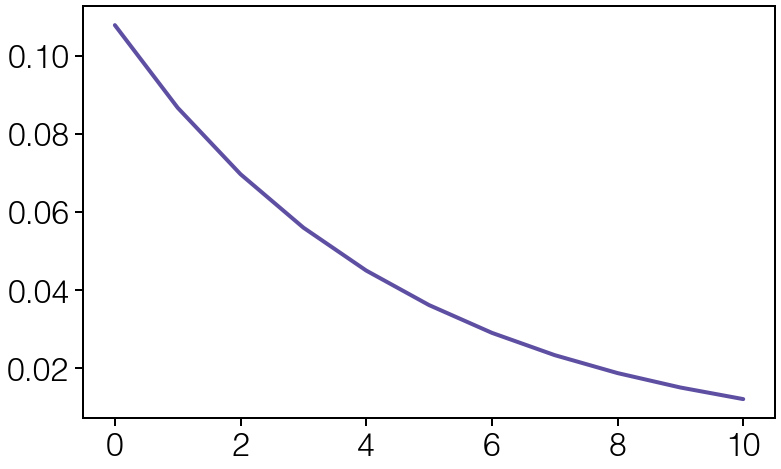

In [163]:
Pn = Prob(21,0.5,1)
plt.plot(Pn[0])

In [48]:
2*sum(Prob(11,1,1)[0])#-Prob(60,1,1)[0][30]

1.0

In [164]:
psigma=1
p=1
alpha=2

In [165]:
for N in range(1,Nmax+1,step):
    Pn,lnPn=Prob(N,psigma,p)
    Salpha=0.0    
    for n in range(0,int(N/2)):
        element=1*alpha*lnPn[n]-(alpha-1)*(logfactorial[N]-logfactorial[n]-logfactorial[N-n])
        Salpha+=2*np.exp(element)
    if int(N/2)==N/2:
        f=1.0
    else:
        f=2.0
    n=int(N/2)    
    element=1*alpha*lnPn[n]-(alpha-1)*(logfactorial[N]-logfactorial[n]-logfactorial[N-n])
    Salpha+=f*np.exp(element)
    Salpha=1/(1-alpha)*np.log(Salpha)
    S2[int(N/step)]=Salpha


In [166]:
for N in range(1,Nmax+1,step):
    Pn,lnPn=Prob(N,psigma,p)
    Sv=0.0    
    for n in range(0,int(N/2)):
        element=(logfactorial[N]-logfactorial[n]-logfactorial[N-n])
        Sv+=2*element*Pn[n]-2*Pn[n]*lnPn[n]
    if int(N/2)==N/2:
        f=1.0
    else:
        f=2.0
    n=int(N/2)    
    element=(logfactorial[N]-logfactorial[n]-logfactorial[N-n])
    Sv+=f*element*Pn[n]-2*Pn[n]*lnPn[n]
    S1[int(N/step)]=Sv


In [167]:
for N in range(1,Nmax+1,step):
    nhalfe[int(N/step)]=(N)**psigma
    nlog[int(N/step)]=np.log(N)

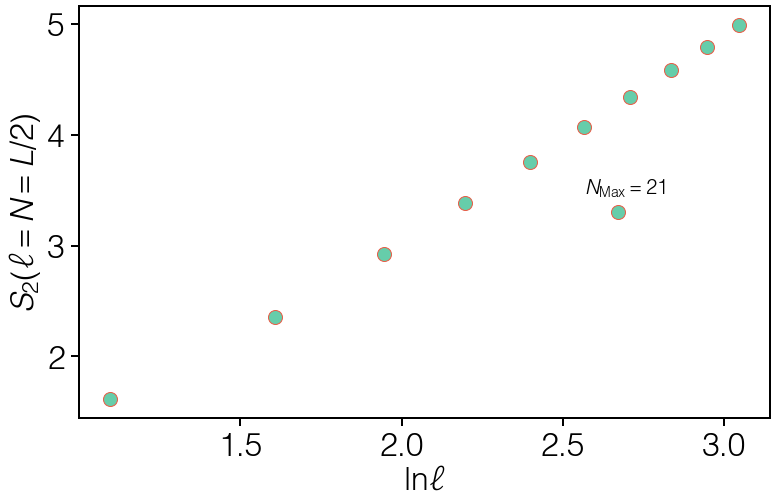

In [173]:
fig = plt.figure()
ax= fig.add_subplot(111)
ax.plot(nlog[1:-1],S2[1:-1],'o',label=" ",zorder=1,ms=7.0,mfc=green,c=red,markeredgewidth = '0.5')
ax.set_xlabel(r'$\ln \ell$')
ax.set_ylabel(r'$S_2(\ell=N=L/2)$')
lgnd = plt.legend(loc=(0.72,0.45), fontsize=9, handlelength=0,handleheight=1.5,title=r'$N_{\rm{Max}}=21$',frameon=False)
plt.savefig('S2.pdf', transparent=False)    
plt.savefig('S2.svg', transparent=False)    
plt.show()

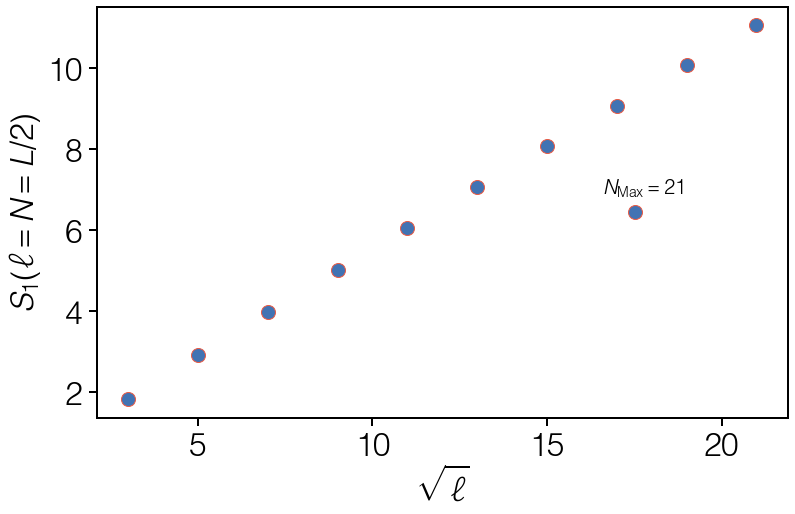

In [174]:
fig1 = plt.figure()
ax1= fig1.add_subplot(111)
ax1.plot(nhalfe[1:-1],S1[1:-1],'o',label=r' ',zorder=1,ms=7.0,mfc=blue,c=red,markeredgewidth = '0.5')
ax1.set_xlabel(r'$\sqrt{\ell}$')
ax1.set_ylabel(r'$S_1(\ell=N=L/2)$')
lgnd = plt.legend(loc=(0.72,0.45), fontsize=9, handlelength=0,handleheight=1.5,title=r'$N_{\rm{Max}}=21$',frameon=False)
plt.savefig('S1.pdf', transparent=False)    
plt.savefig('S1.svg', transparent=False)    
plt.show()

In [194]:
colors = {'light blue':"#6290c3",'aero blue':"#c2e7da",'honeydew':"#f1ffe7",
          'dark blue':"#1a1b41",'lime':"#baff29"}

# https://coolors.co/f46036-2e294e-1b998b-e71d36-c5d86d
colors = {'orange':'#f46036','purple':'#2e294E','teal':'#1B998B','red':'#E71D36','green':'#c5D86D','aero blue':"#c2e7da"}

In [ ]:
props = {'mec':ncolors[iV],'mew':0.5, 'ecolor':ncolors[iV], 'elinewidth':0.5,'ms':3,
                 'mfc':colortools.get_alpha_hex(ncolors[iV],0.5), 'color':ncolors[iV], 'ls':'--', 'lw':0.5}

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


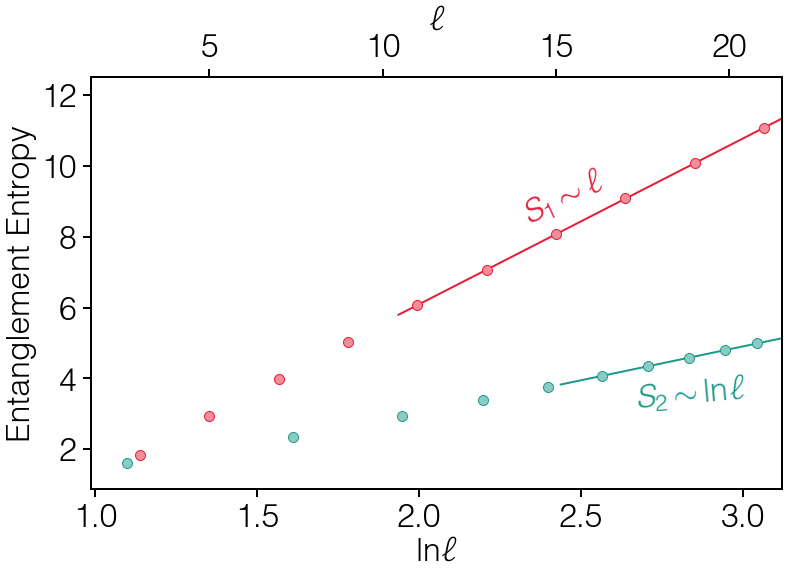

In [193]:
fig1 = plt.figure()
ax2 = fig1.add_subplot(111)
ax1 = ax2.twiny()

S1col = colors['red']
S2col = colors['teal']

# Von Neumann Entropy
x,y= nhalfe[1:-1],S1[1:-1]
z = np.polyfit(x[-6:],y[-6:],1)
lfit = np.linspace(0.95*x[-6],1.5*x[-1],100)

ax1.plot(x,y,'o',zorder=1,ms=5, 
         mfc=colortools.get_alpha_hex(S1col,0.5),mec=S1col,mew=0.5)
ax1.plot(lfit,np.poly1d(z)(lfit),lw=1,color=S1col,zorder=-1)
ax1.set_xlabel('$\ell$')
ax1.set_xlim(right=1.025*x[-1])
ax1.text(0.75,0.625,r'$S_1 \sim \ell$',transform=ax1.transAxes, ha='right', va='bottom', 
          fontsize=16, fontweight=300, color=S1col, rotation=25)

# Renyi Entropy
x,y= nlog[1:-1],S2[1:-1]
z = np.polyfit(x[-5:],y[-5:],1)
lfit = np.linspace(0.95*x[-5],1.1*x[-1],100)
ax2.plot(lfit,np.poly1d(z)(lfit),lw=1,color=colors['teal'],zorder=-1)

ax2.plot(x,y,'o',zorder=1,ms=5,
         mfc=colortools.get_alpha_hex(colors['teal'],0.5),mec=colors['teal'],mew=0.5)
ax2.set_xlabel('$\ln{\ell}$')
ax2.set_xlim(right=1.025*x[-1])
ax2.text(0.95,0.18,r'$S_2 \sim \ln \ell$',transform=ax2.transAxes, ha='right', va='bottom', 
          fontsize=16, fontweight=300, color=colors['teal'], rotation=5)

ax2.set_ylim(top=12.5)

#axin = ax1.inset_axes([0.01, 0.5, 0.5, 0.5])
#im = plt.imread("spatial_subregion.png")
#axin.imshow(plt.imread("spatial_subregion.png"), aspect='auto')
#axin.set_aspect('equal')
#axin.set_yscale('linear')
#axin.axis('off')

#fig1.figimage(im,100,10, origin='lower')
#ax2.imshow(im, aspect='auto', extent=(0.4, 0.6, .5, .7), zorder=-1)

ax2.set_ylabel('Entanglement Entropy')

plt.savefig('entanglement_scaling.svg')